<a href="https://colab.research.google.com/github/Mirabelljoicelaura/MACHINE-LEARNING/blob/main/Kelompok_2_Kuis_1(Alfi%2CMirabell%2CM_Rafi).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

KUIS MACHINE LEARNING

KELOMPOK ..

Kelas : D4 Teknik Informatika / 3D

Anggota :

1. Alfi Surya
2. Mirabell Joice Laura / 2141720174
3. Muhamad Rafi Prabowo / 2141720239

In [29]:
# Unduh Dataset MNIST
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')
# Baca deskripsi dataset
# Tahap ini mungkin diperlukan untuk lebih memahami dataset
print(mnist.DESCR)
# Inspeksi semua key dalam dataset
# Cara ini digunakan untuk memahami struktur dari dataset MNIST
mnist.keys()

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# NOMOR 1

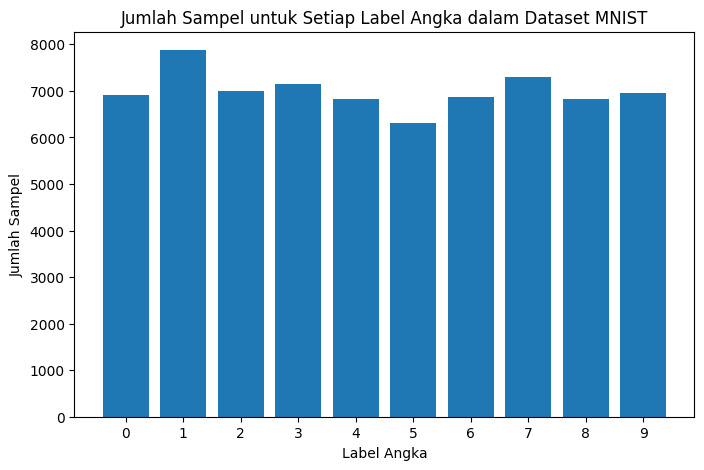

In [31]:
# Hitung jumlah sampel untuk setiap label
label_counts = [0] * 10
for label in mnist.target:
    label_as_int = int(label)  # Konversi label ke integer
    label_counts[label_as_int] += 1

# Plot jumlah sampel untuk setiap label

plt.figure(figsize=(8, 5))
plt.bar(range(10), label_counts)
plt.xticks(range(10), labels=[str(i) for i in range(10)])
plt.xlabel('Label Angka')
plt.ylabel('Jumlah Sampel')
plt.title('Jumlah Sampel untuk Setiap Label Angka dalam Dataset MNIST')
plt.show()


**KESIMPULAN :**Setiap label angka (0 hingga 9) dalam dataset MNIST memiliki jumlah sampel sekitar 6000 hingga 8000 data, maka dapat disimpulkan bahwa dataset tersebut memiliki distribusi yang relatif seimbang. Dalam konteks dataset MNIST, ini menunjukkan bahwa jumlah citra untuk setiap digit tulisan tangan secara keseluruhan cukup selaras, sehingga tidak ada ketidakseimbangan data yang signifikan.Distribusi yang relatif seimbang dalam dataset berguna untuk membantu mencegah masalah ketidakseimbangan kelas, yang dapat mempengaruhi hasil pelatihan model.

# NOMOR 2

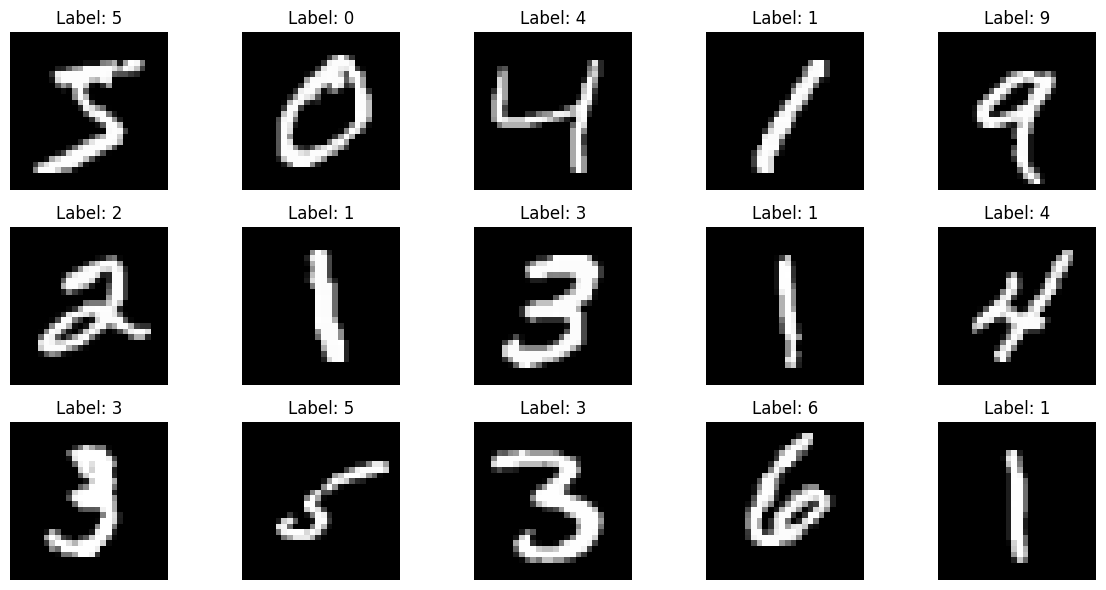

In [32]:
# Mengambil data dan target dari dataset MNIST
X, y = mnist.data.to_numpy(), mnist.target.astype(int)

# Menampilkan 15 citra pertama berserta labelnya
plt.figure(figsize=(12, 6))
for i in range(15):
    plt.subplot(3, 5, i + 1)
    plt.imshow(X[i].reshape(28, 28), cmap='gray')
    plt.title(f'Label: {y[i]}')
    plt.axis('off')

plt.tight_layout()
plt.show()


# NOMOR 3

Nilai asli

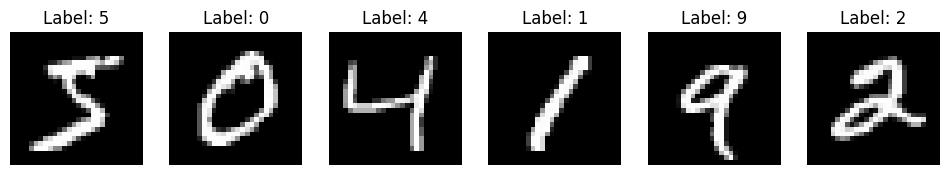

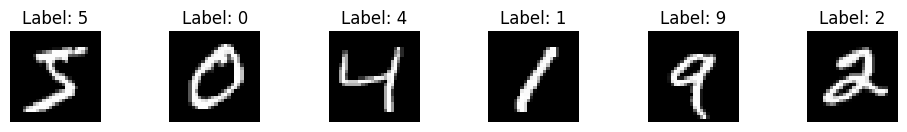

In [33]:
# Display a 2x3 grid of images, labels, and histograms
num_images_to_display = 6

plt.figure(figsize=(12, 8))

for i in range(num_images_to_display):
    plt.subplot(3, num_images_to_display, i + 1)
    plt.imshow(X[i].reshape(28, 28), cmap='gray')
    plt.title(f'Label: {y[i]}')
    plt.axis('off')

# Extract features (original pixel values)
X_features = X[:num_images_to_display].reshape(num_images_to_display, -1)

# Optionally, normalize the features to the range [0, 1]
X_features_normalized = X_features / 255.0

# Display the extracted features (reshaped to images for visualization)
plt.figure(figsize=(12, 4))

for i in range(num_images_to_display):
    plt.subplot(3, num_images_to_display, i + 1)
    plt.imshow(X_features_normalized[i].reshape(28, 28), cmap='gray')
    plt.title(f'Label: {y[i]}')
    plt.axis('off')

plt.show()


Histogram

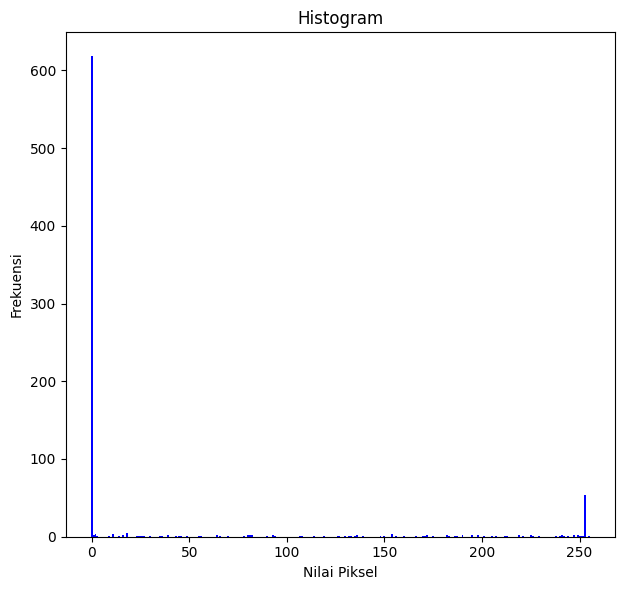

In [34]:
# Fungsi untuk menghitung histogram gambar
def compute_image_histogram(image, num_bins=256):
    histogram, _ = np.histogram(image.flatten(), bins=num_bins, range=(0, 256))
    return histogram

# Pilih satu citra (misalnya, citra pertama)
selected_image = X[0]

# Jumlah fitur dalam histogram (jumlah bin)
num_bins = 256

# Menghitung histogram untuk citra yang dipilih
histogram = compute_image_histogram(selected_image)

# Menampilkan histogram
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 2)
plt.bar(range(num_bins), histogram, color='b', width=1)
plt.title('Histogram')
plt.xlabel('Nilai Piksel')
plt.ylabel('Frekuensi')

plt.tight_layout()
plt.show()


# NOMOR 4

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.svm import SVC

In [36]:
# Scaling data
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [37]:
# Split data dengan rasio 70:30
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
print("Rasio 70:30")
print("Jumlah data training:", len(X_train))
print("Jumlah data testing:", len(X_test))

Rasio 70:30
Jumlah data training: 49000
Jumlah data testing: 21000


In [38]:
# split data dengan rasio 80 : 20
X_train_80, X_test_80, y_train_80, y_test_80 = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
print("Rasio 80:20")
print("Jumlah data training:", len(X_train_80))
print("Jumlah data testing:", len(X_test_80))

Rasio 80:20
Jumlah data training: 56000
Jumlah data testing: 14000


In [39]:
# split data dengan rasio 90 : 10
X_train_90, X_test_90, y_train_90, y_test_90 = train_test_split(X_scaled, y, test_size=0.1, random_state=42)

print("Rasio 90:10")
print("Jumlah data training:", len(X_train_90))
print("Jumlah data testing:", len(X_test_90))


Rasio 90:10
Jumlah data training: 63000
Jumlah data testing: 7000


In [40]:
svc = SVC(C=5.0, gamma=0.05, kernel='linear')  # You can adjust C and gamma based on your needs
svc.fit(X_train, y_train)

SVC(C=5.0, gamma=0.05, kernel='linear')

# PERMODELAN RASIO 70 : 30
NOMOR 5 - 7

Naive Bayes

In [41]:
from sklearn.decomposition import PCA

# Proses data latih dengan PCA
pca = PCA(n_components=2)  # Ubah angka komponen sesuai kebutuhan
X_train_pca = pca.fit_transform(X_train)  # X_train adalah data latih Anda

# Proses data uji dengan PCA
X_test_pca = pca.transform(X_test)  # X_test adalah data uji Anda

# Selanjutnya, Anda dapat melatih model Naive Bayes
from sklearn.naive_bayes import GaussianNB
naive_bayes_model = GaussianNB()
naive_bayes_model.fit(X_train_pca, y_train)

# Lakukan prediksi menggunakan model Gaussian Naive Bayes pada data uji yang telah diproses PCA
y_pred_nb = naive_bayes_model.predict(X_test_pca)

# Hitung akurasi
accuracy_nb = accuracy_score(y_test, y_pred_nb)

# Laporan metrik klasifikasi
classification_report_nb = classification_report(y_test, y_pred_nb)

# Tampilkan hasil akurasi dan laporan metrik klasifikasi untuk model Naive Bayes
print(f'Accuracy (Naive Bayes): {accuracy_nb}')
print('Classification Report (Naive Bayes):\n', classification_report_nb)


Accuracy (Naive Bayes): 0.4430952380952381
Classification Report (Naive Bayes):
               precision    recall  f1-score   support

           0       0.63      0.79      0.70      2058
           1       0.79      0.95      0.87      2364
           2       0.16      0.00      0.00      2133
           3       0.42      0.62      0.51      2176
           4       0.34      0.51      0.41      1936
           5       0.18      0.00      0.01      1915
           6       0.33      0.40      0.36      2088
           7       0.38      0.63      0.48      2248
           8       0.25      0.41      0.31      1992
           9       0.26      0.00      0.01      2090

    accuracy                           0.44     21000
   macro avg       0.38      0.43      0.36     21000
weighted avg       0.38      0.44      0.37     21000



SVM

In [42]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Inisialisasi model SVM dengan kernel linear
svm_model = SVC(kernel='linear')

# Melatih model SVM dengan data latih yang telah diproses PCA
svm_model.fit(X_train_pca, y_train)

# Lakukan prediksi menggunakan model SVM pada data uji yang telah diproses PCA
y_pred_svm = svm_model.predict(X_test_pca)

# Hitung akurasi
accuracy_svm = accuracy_score(y_test, y_pred_svm)

# Laporan metrik klasifikasi
classification_report_svm = classification_report(y_test, y_pred_svm)

# Tampilkan hasil akurasi dan laporan metrik klasifikasi untuk model SVM
print(f'Accuracy: {accuracy_svm}')
print('Classification Report (SVM):\n', classification_report_svm)


Accuracy: 0.4521428571428571
Classification Report (SVM):
               precision    recall  f1-score   support

           0       0.65      0.78      0.71      2058
           1       0.81      0.96      0.88      2364
           2       0.24      0.09      0.13      2133
           3       0.46      0.61      0.52      2176
           4       0.36      0.40      0.38      1936
           5       0.18      0.04      0.06      1915
           6       0.33      0.44      0.38      2088
           7       0.40      0.68      0.51      2248
           8       0.28      0.33      0.30      1992
           9       0.31      0.07      0.12      2090

    accuracy                           0.45     21000
   macro avg       0.40      0.44      0.40     21000
weighted avg       0.41      0.45      0.41     21000



In [43]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Evaluasi model terhadap data training
y_train_pred = naive_bayes_model.predict(X_train_pca)
accuracy_train = accuracy_score(y_train, y_train_pred)
report_train = classification_report(y_train, y_train_pred)
confusion_train = confusion_matrix(y_train, y_train_pred)

# Evaluasi model terhadap data testing
y_test_pred = naive_bayes_model.predict(X_test_pca)
accuracy_test = accuracy_score(y_test, y_test_pred)
report_test = classification_report(y_test, y_test_pred)
confusion_test = confusion_matrix(y_test, y_test_pred)

# Tampilkan hasil evaluasi
print("Evaluasi Model terhadap Data Training:")
print(f'Accuracy (Training): {accuracy_train}')
print('Classification Report (Training):\n', report_train)
print('Confusion Matrix (Training):\n', confusion_train)

print("\nEvaluasi Model terhadap Data Testing:")
print(f'Accuracy (Testing): {accuracy_test}')
print('Classification Report (Testing):\n', report_test)
print('Confusion Matrix (Testing):\n', confusion_test)


Evaluasi Model terhadap Data Training:
Accuracy (Training): 0.43989795918367347
Classification Report (Training):
               precision    recall  f1-score   support

           0       0.63      0.79      0.70      4845
           1       0.80      0.95      0.87      5513
           2       0.08      0.00      0.00      4857
           3       0.42      0.63      0.50      4965
           4       0.36      0.50      0.42      4888
           5       0.24      0.01      0.01      4398
           6       0.32      0.38      0.35      4788
           7       0.36      0.62      0.46      5045
           8       0.25      0.39      0.31      4833
           9       0.27      0.00      0.01      4868

    accuracy                           0.44     49000
   macro avg       0.37      0.43      0.36     49000
weighted avg       0.38      0.44      0.37     49000

Confusion Matrix (Training):
 [[3823    1    7  160   32   17  635    5  164    1]
 [   0 5242    0   80    0    0    5   17  

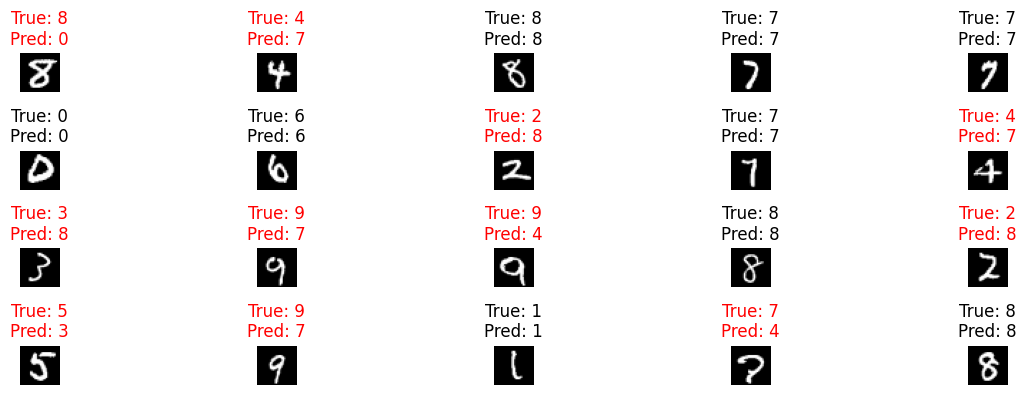

In [44]:
n_samples_to_display = 20
# Menampilkan gambar label asli dan label prediksi
plt.figure(figsize=(12, 6))
for i in range(n_samples_to_display):
    plt.subplot(6, 5, i + 1)
    plt.imshow(X_test[i].reshape(28, 28), cmap="gray")

    # Menentukan warna teks berdasarkan true atau prediksi
    true_label = y_test.iloc[i] if isinstance(y_test, pd.Series) else y_test[i]
    pred_label = y_pred_nb[i]  # Menggunakan y_pred_nb untuk model Naive Bayes

    if true_label == pred_label:
        text_color = 'black'
    else:
        text_color = 'red'

    plt.title(f"True: {true_label}\nPred: {pred_label}", color=text_color)
    plt.axis("off")

plt.tight_layout()
plt.show()


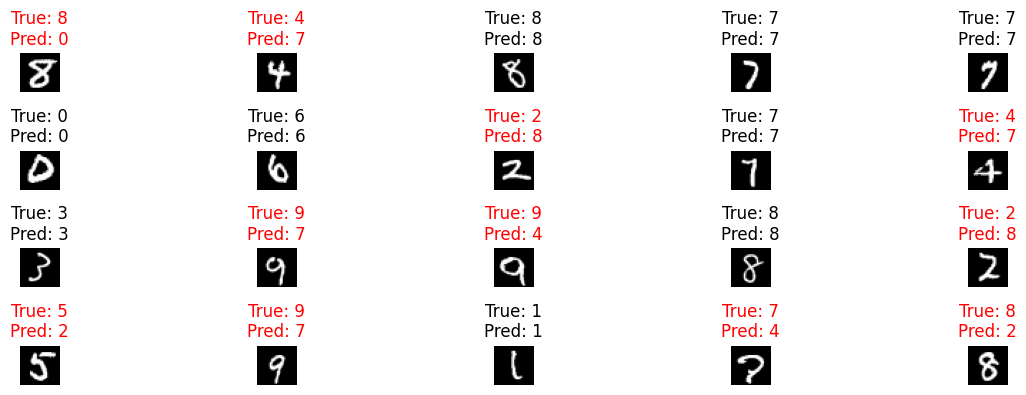

In [45]:
n_samples_to_display = 20
# Menampilkan gambar label asli dan label prediksi untuk model SVM
plt.figure(figsize=(12, 6))
for i in range(n_samples_to_display):
    plt.subplot(6, 5, i + 1)
    plt.imshow(X_test[i].reshape(28, 28), cmap="gray")

    # Menentukan warna teks berdasarkan true atau prediksi
    true_label = y_test.iloc[i] if isinstance(y_test, pd.Series) else y_test[i]
    pred_label = y_pred_svm[i]  # Menggunakan y_pred_svm untuk model SVM

    if true_label == pred_label:
        text_color = 'black'
    else:
        text_color = 'red'

    plt.title(f"True: {true_label}\nPred: {pred_label}", color=text_color)
    plt.axis("off")

plt.tight_layout()
plt.show()


# PERMODELAN RASIO 80 : 20
NOMOR 5 - 7

Naive Bayes

In [46]:
n_components = 10
pca = PCA(n_components=n_components)

# Melakukan PCA pada data training
X_train_80_pca = pca.fit_transform(X_train_80)

# Melakukan PCA pada data testing
X_test_80_pca = pca.transform(X_test_80)

# Inisialisasi model Gaussian Naive Bayes
naive_bayes_model = GaussianNB()

# Melatih model Gaussian Naive Bayes dengan data latih yang telah diproses PCA
naive_bayes_model.fit(X_train_80_pca, y_train_80)

# Lakukan prediksi menggunakan model Gaussian Naive Bayes pada data uji yang telah diproses PCA
y_pred_nb = naive_bayes_model.predict(X_test_80_pca)

# Hitung akurasi
accuracy_nb = accuracy_score(y_test_80, y_pred_nb)

# Laporan metrik klasifikasi
classification_report_nb = classification_report(y_test_80, y_pred_nb)

# Tampilkan hasil akurasi dan laporan metrik klasifikasi untuk model Naive Bayes
print(f'Accuracy (Naive Bayes): {accuracy_nb}')
print('Classification Report (Naive Bayes):\n', classification_report_nb)

Accuracy (Naive Bayes): 0.7749285714285714
Classification Report (Naive Bayes):
               precision    recall  f1-score   support

           0       0.91      0.82      0.86      1343
           1       0.85      0.94      0.90      1600
           2       0.83      0.77      0.79      1380
           3       0.73      0.73      0.73      1433
           4       0.68      0.75      0.72      1295
           5       0.63      0.69      0.66      1273
           6       0.84      0.84      0.84      1396
           7       0.87      0.83      0.85      1503
           8       0.75      0.73      0.74      1357
           9       0.65      0.62      0.63      1420

    accuracy                           0.77     14000
   macro avg       0.77      0.77      0.77     14000
weighted avg       0.78      0.77      0.78     14000



SVM

In [47]:
# Inisialisasi model SVM dengan kernel linear
svm_model = SVC(kernel='linear')

# Melatih model SVM dengan data latih yang telah diproses PCA
svm_model.fit(X_train_80_pca, y_train_80)

# Lakukan prediksi menggunakan model SVM pada data uji yang telah diproses PCA
y_pred_svm = svm_model.predict(X_test_80_pca)

# Hitung akurasi
accuracy_svm = accuracy_score(y_test_80, y_pred_svm)

# Laporan metrik klasifikasi
classification_report_svm = classification_report(y_test_80, y_pred_svm)

# Tampilkan hasil akurasi dan laporan metrik klasifikasi untuk model SVM
print(f'Accuracy (SVM): {accuracy_svm}')
print('Classification Report (SVM):\n', classification_report_svm)


Accuracy (SVM): 0.8377857142857142
Classification Report (SVM):
               precision    recall  f1-score   support

           0       0.89      0.92      0.90      1343
           1       0.92      0.97      0.94      1600
           2       0.84      0.84      0.84      1380
           3       0.79      0.80      0.80      1433
           4       0.76      0.81      0.78      1295
           5       0.78      0.77      0.78      1273
           6       0.89      0.89      0.89      1396
           7       0.90      0.88      0.89      1503
           8       0.84      0.78      0.81      1357
           9       0.73      0.69      0.71      1420

    accuracy                           0.84     14000
   macro avg       0.83      0.84      0.83     14000
weighted avg       0.84      0.84      0.84     14000



In [48]:
# Evaluasi model terhadap data training
y_train_pred = naive_bayes_model.predict(X_train_80_pca)
accuracy_train = accuracy_score(y_train_80, y_train_pred)
report_train = classification_report(y_train_80, y_train_pred)
confusion_train = confusion_matrix(y_train_80, y_train_pred)

# Evaluasi model terhadap data testing
y_test_pred = naive_bayes_model.predict(X_test_80_pca)
accuracy_test = accuracy_score(y_test_80, y_test_pred)
report_test = classification_report(y_test_80, y_test_pred)
confusion_test = confusion_matrix(y_test_80, y_test_pred)

# Tampilkan hasil evaluasi
print("Evaluasi Model terhadap Data Training:")
print(f'Accuracy (Training): {accuracy_train}')
print('Classification Report (Training):\n', report_train)
print('Confusion Matrix (Training):\n', confusion_train)

print("\nEvaluasi Model terhadap Data Testing:")
print(f'Accuracy (Testing): {accuracy_test}')
print('Classification Report (Testing):\n', report_test)
print('Confusion Matrix (Testing):\n', confusion_test)


Evaluasi Model terhadap Data Training:
Accuracy (Training): 0.7701428571428571
Classification Report (Training):
               precision    recall  f1-score   support

           0       0.91      0.82      0.86      5560
           1       0.85      0.94      0.89      6277
           2       0.82      0.77      0.79      5610
           3       0.72      0.73      0.72      5708
           4       0.70      0.73      0.72      5529
           5       0.61      0.67      0.64      5040
           6       0.86      0.84      0.85      5480
           7       0.87      0.82      0.84      5790
           8       0.74      0.73      0.73      5468
           9       0.63      0.63      0.63      5538

    accuracy                           0.77     56000
   macro avg       0.77      0.77      0.77     56000
weighted avg       0.77      0.77      0.77     56000

Confusion Matrix (Training):
 [[4575    0   33  113    9  609  194    7   13    7]
 [   0 5877  176   23    3   80   35   14   

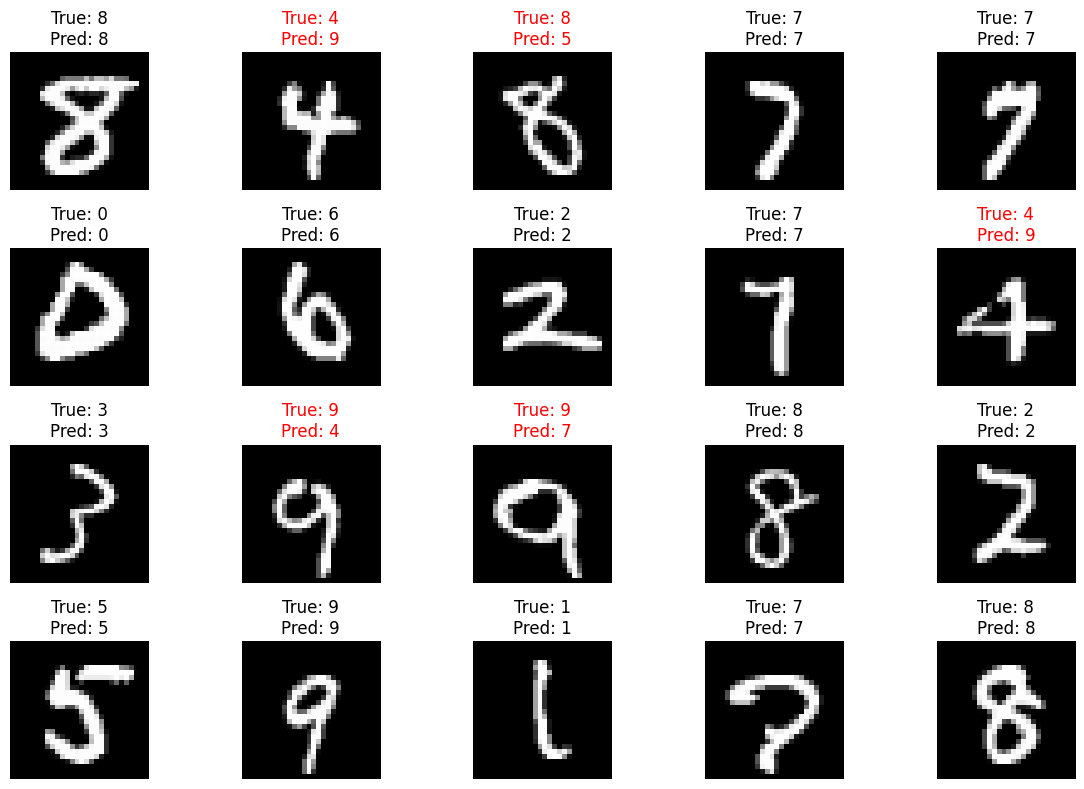

In [49]:
n_samples_to_display = 20

# Prediksi label dengan model Naive Bayes pada data uji yang telah diproses PCA
y_pred_nb = naive_bayes_model.predict(X_test_80_pca)

# Menampilkan gambar dengan label asli dan label prediksi
plt.figure(figsize=(12, 8))
for i in range(n_samples_to_display):
    plt.subplot(4, 5, i + 1)
    plt.imshow(X_test_80[i].reshape(28, 28), cmap="gray")

    # Menentukan warna teks berdasarkan true atau prediksi
    true_label = y_test_80.values[i]
    pred_label = y_pred_nb[i]

    if true_label == pred_label:
        text_color = 'black'
    else:
        text_color = 'red'

    plt.title(f"True: {true_label}\nPred: {pred_label}", color=text_color)
    plt.axis("off")

plt.tight_layout()
plt.show()


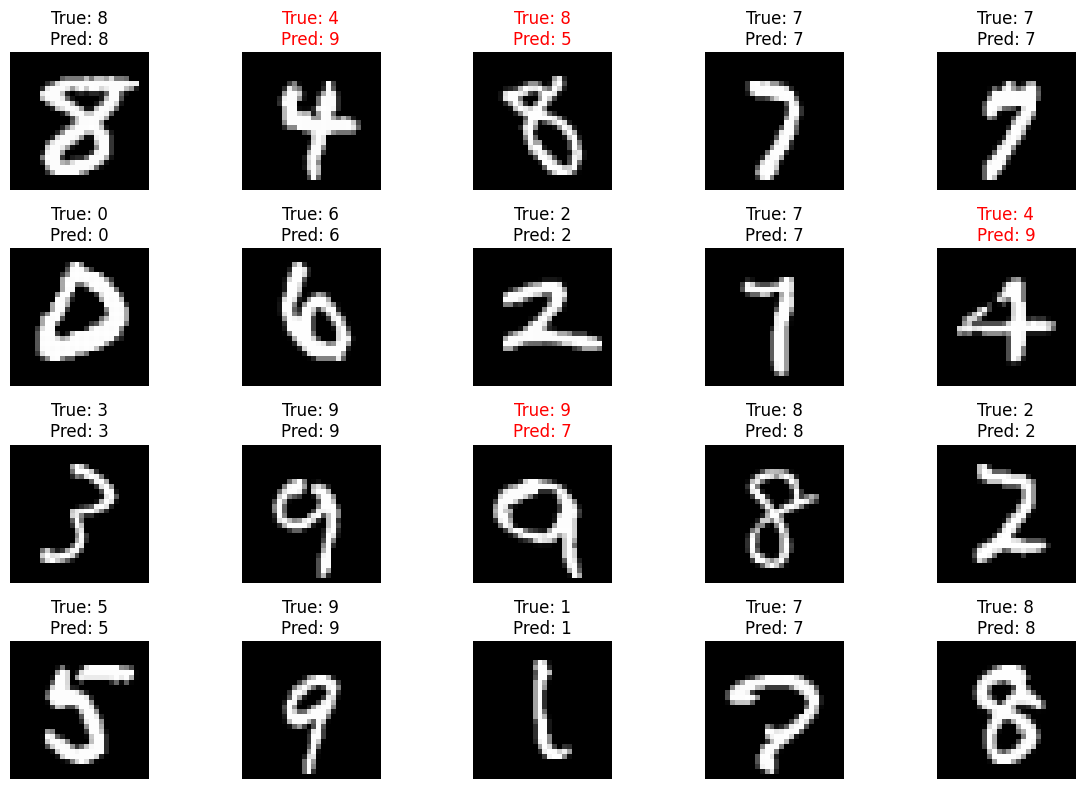

In [50]:
n_samples_to_display = 20

# Prediksi label dengan model Naive Bayes pada data uji yang telah diproses PCA
y_pred_nb = naive_bayes_model.predict(X_test_80_pca)

# Menampilkan gambar dengan label asli dan label prediksi
plt.figure(figsize=(12, 8))
for i in range(n_samples_to_display):
    plt.subplot(4, 5, i + 1)
    plt.imshow(X_test_80[i].reshape(28, 28), cmap="gray")

    # Menentukan warna teks berdasarkan true atau prediksi
    true_label = y_test_80.values[i]
    pred_label = y_pred_svm[i]

    if true_label == pred_label:
        text_color = 'black'
    else:
        text_color = 'red'

    plt.title(f"True: {true_label}\nPred: {pred_label}", color=text_color)
    plt.axis("off")

plt.tight_layout()
plt.show()


# PERMODELAN RASIO 90 : 10
NOMOR 5 - 7

In [28]:
n_components = 10
pca = PCA(n_components=n_components)

# Melakukan PCA pada data training
X_train_90_pca = pca.fit_transform(X_train_90)

# Melakukan PCA pada data testing
X_test_90_pca = pca.transform(X_test_90)

naive_bayes_model = GaussianNB()

# Melatih model Gaussian Naive Bayes dengan data latih yang telah diproses PCA
naive_bayes_model.fit(X_train_90_pca, y_train_90)

# Lakukan prediksi menggunakan model Gaussian Naive Bayes pada data uji yang telah diproses PCA
y_pred_nb = naive_bayes_model.predict(X_test_90_pca)

# Hitung akurasi
accuracy_nb = accuracy_score(y_test_90, y_pred_nb)

# Laporan metrik klasifikasi
classification_report_nb = classification_report(y_test_90, y_pred_nb)

# Tampilkan hasil akurasi dan laporan metrik klasifikasi untuk model Naive Bayes
print(f'Accuracy (Naive Bayes): {accuracy_nb}')
print('Classification Report (Naive Bayes):\n', classification_report_nb)


Accuracy (Naive Bayes): 0.7692857142857142
Classification Report (Naive Bayes):
               precision    recall  f1-score   support

           0       0.90      0.82      0.86       683
           1       0.84      0.94      0.89       800
           2       0.83      0.75      0.79       674
           3       0.73      0.72      0.73       760
           4       0.66      0.77      0.71       611
           5       0.62      0.69      0.65       658
           6       0.83      0.82      0.82       677
           7       0.88      0.82      0.85       724
           8       0.76      0.72      0.74       693
           9       0.66      0.61      0.63       720

    accuracy                           0.77      7000
   macro avg       0.77      0.77      0.77      7000
weighted avg       0.77      0.77      0.77      7000



In [51]:
# Inisialisasi model SVM dengan kernel linear
svm_model = SVC(kernel='linear')

# Melatih model SVM dengan data latih yang telah diproses PCA
svm_model.fit(X_train_90_pca, y_train_90)

# Lakukan prediksi menggunakan model SVM pada data uji yang telah diproses PCA
y_pred_svm = svm_model.predict(X_test_90_pca)

# Hitung akurasi
accuracy_svm = accuracy_score(y_test_90, y_pred_svm)

# Laporan metrik klasifikasi
classification_report_svm = classification_report(y_test_90, y_pred_svm)

# Tampilkan hasil akurasi dan laporan metrik klasifikasi untuk model SVM
print(f'Accuracy (SVM): {accuracy_svm}')
print('Classification Report (SVM):\n', classification_report_svm)


Accuracy (SVM): 0.8368571428571429
Classification Report (SVM):
               precision    recall  f1-score   support

           0       0.89      0.92      0.91       683
           1       0.91      0.97      0.94       800
           2       0.83      0.83      0.83       674
           3       0.80      0.79      0.80       760
           4       0.76      0.82      0.78       611
           5       0.78      0.79      0.79       658
           6       0.89      0.88      0.88       677
           7       0.91      0.87      0.89       724
           8       0.84      0.77      0.80       693
           9       0.75      0.70      0.72       720

    accuracy                           0.84      7000
   macro avg       0.83      0.84      0.83      7000
weighted avg       0.84      0.84      0.84      7000



In [52]:
# Evaluasi model terhadap data training
y_train_pred = naive_bayes_model.predict(X_train_90_pca)
accuracy_train = accuracy_score(y_train_90, y_train_pred)
report_train = classification_report(y_train_90, y_train_pred)
confusion_train = confusion_matrix(y_train_90, y_train_pred)

# Evaluasi model terhadap data testing
y_test_pred = naive_bayes_model.predict(X_test_90_pca)
accuracy_test = accuracy_score(y_test_90, y_test_pred)
report_test = classification_report(y_test_90, y_test_pred)
confusion_test = confusion_matrix(y_test_90, y_test_pred)

# Tampilkan hasil evaluasi
print("Evaluasi Model terhadap Data Training:")
print(f'Accuracy (Training): {accuracy_train}')
print('Classification Report (Training):\n', report_train)
print('Confusion Matrix (Training):\n', confusion_train)

print("\nEvaluasi Model terhadap Data Testing:")
print(f'Accuracy (Testing): {accuracy_test}')
print('Classification Report (Testing):\n', report_test)
print('Confusion Matrix (Testing):\n', confusion_test)


Evaluasi Model terhadap Data Training:
Accuracy (Training): 0.7714444444444445
Classification Report (Training):
               precision    recall  f1-score   support

           0       0.90      0.83      0.86      6220
           1       0.85      0.94      0.89      7077
           2       0.82      0.77      0.80      6316
           3       0.72      0.73      0.72      6381
           4       0.70      0.74      0.72      6213
           5       0.62      0.67      0.64      5655
           6       0.86      0.84      0.85      6199
           7       0.87      0.82      0.84      6569
           8       0.74      0.73      0.73      6132
           9       0.63      0.63      0.63      6238

    accuracy                           0.77     63000
   macro avg       0.77      0.77      0.77     63000
weighted avg       0.77      0.77      0.77     63000

Confusion Matrix (Training):
 [[5137    0   37  133   12  658  214    7   13    9]
 [   0 6624  190   33    4   87   36   22   

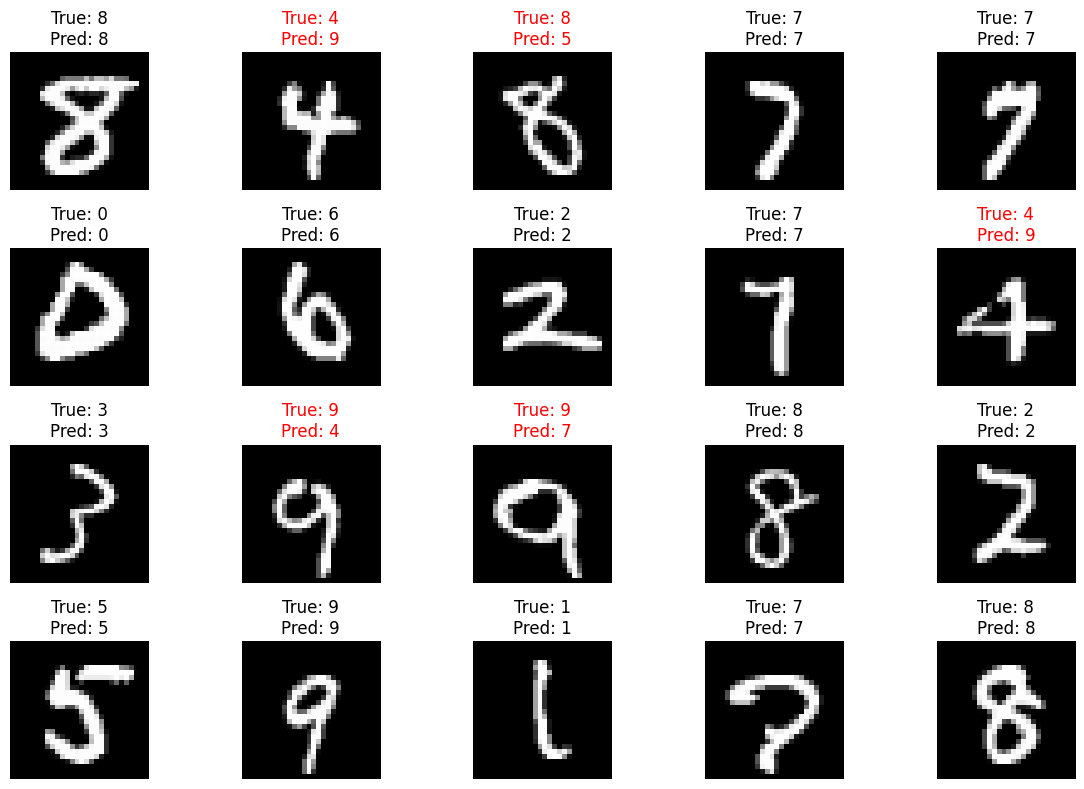

In [53]:
n_samples_to_display = 20

# Prediksi label dengan model Naive Bayes pada data uji yang telah diproses PCA
y_pred_nb = naive_bayes_model.predict(X_test_90_pca)

# Menampilkan gambar dengan label asli dan label prediksi
plt.figure(figsize=(12, 8))
for i in range(n_samples_to_display):
    plt.subplot(4, 5, i + 1)
    plt.imshow(X_test_90[i].reshape(28, 28), cmap="gray")

    # Menentukan warna teks berdasarkan true atau prediksi
    true_label = y_test_90.values[i]
    pred_label = y_pred_nb[i]

    if true_label == pred_label:
        text_color = 'black'
    else:
        text_color = 'red'

    plt.title(f"True: {true_label}\nPred: {pred_label}", color=text_color)
    plt.axis("off")

plt.tight_layout()
plt.show()


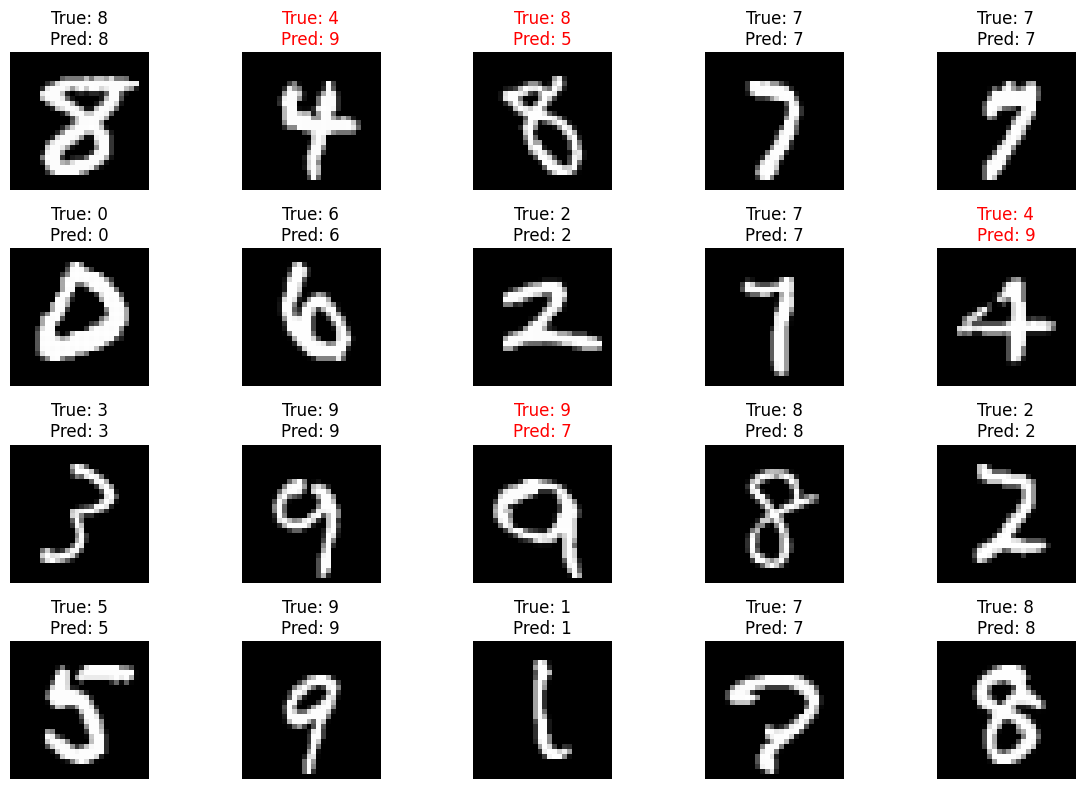

In [27]:
n_samples_to_display = 20

# Prediksi label dengan model Naive Bayes pada data uji yang telah diproses PCA
y_pred_nb = naive_bayes_model.predict(X_test_90_pca)

# Menampilkan gambar dengan label asli dan label prediksi
plt.figure(figsize=(12, 8))
for i in range(n_samples_to_display):
    plt.subplot(4, 5, i + 1)
    plt.imshow(X_test_90[i].reshape(28, 28), cmap="gray")

    # Menentukan warna teks berdasarkan true atau prediksi
    true_label = y_test_90.values[i]
    pred_label = y_pred_svm[i]

    if true_label == pred_label:
        text_color = 'black'
    else:
        text_color = 'red'

    plt.title(f"True: {true_label}\nPred: {pred_label}", color=text_color)
    plt.axis("off")

plt.tight_layout()
plt.show()

#NOMOR 8


Dalam studi kasus ini,kami menggunakan dua permodelan yaitu Naive Bayes dan SVM kernel linear.

Dengan menggunakan ratio 70:30, 80:20, dan 90:10.
- Pada ratio 70 : 30 didapatkan hasil Naive Bayes Accuracy: 0.4430952380952381
SVM Accuracy: 0.4522380952380952
Pada rasio 70:30, kedua permodelan memiliki tingkat akurasi yang cukup rendah, yaitu sekitar 44% untuk Naive Bayes dan 45% untuk SVM. Ini mungkin menunjukkan bahwa pembagian data yang terlalu banyak untuk pengujian (30%) dapat menyebabkan model kurang baik dalam melakukan prediksi.
- Pada ratio 80 : 20 didapatkan hasil Naive Bayes Accuracy: 0.7748571428571429
SVM Accuracy: 0.8375
Pada rasio 80:20. Naive Bayes mencapai akurasi sekitar 77%, sementara SVM mencapai akurasi sekitar 83%. Ini menunjukkan bahwa dengan meningkatkan ukuran data pelatihan (80% dari dataset), model memiliki kinerja yang lebih baik dalam melakukan prediksi.
- Pada ratio 90 : 10 didapatkan hasil Naive Bayes Accuracy: 0.7691428571428571
SVM Accuracy: 0.8372857142857143
Pada rasio 90:10. Naive Bayes mencapai akurasi sekitar 77%, sementara SVM mencapai akurasi sekitar 83%. Meskipun jumlah data pengujian lebih sedikit (10% dari dataset), akurasi tetap tinggi karena model memiliki akses ke sebagian besar data pelatihan.

Dari hasil diatas dapat disimpulkan bahwa di ketiga ratio, permodelan SVM memiliki tingkat akurasi yang lebih tinggi dari Naive Bayes serta menggunakan konfigurasi rasio data 80 : 20 dengan tingkat akurasi 0.8375.